# FRF generation
A Notebook for generating FRFs after data acquisition.

In [1]:
import lvm_read
from functions import *
import os

In [2]:
def force_window(f):
    N = len(f)
    i_max = np.argmax(f)
    i_low = np.copy(i_max)
    while f[i_low] >= f[i_low-1]:
        i_low -= 1
    i_high = np.copy(i_max)
    while f[i_high] >= 0.:
        i_high += 1
  
    w_f = np.zeros(N)
    w_f[i_low:i_high] = 1. 
    
    return w_f

In [3]:
folder_name = "D:\\Merilna oprema\\notebooks-ni\\data\\Tacer\\A\\"

imp_loc = os.listdir(folder_name)
imp_loc = [value for value in imp_loc if ".npy" in value]
imp_loc = sorted_alphanumeric(imp_loc)
# imp_loc = imp_loc[:-1]

filename_T = folder_name + imp_loc[0] 
_list_data = np.load(filename_T,allow_pickle=True)

_out = _list_data[0]["data"].shape[1]-1
_in = len(imp_loc)

_freq = 6400

H1_main = np.zeros((_freq,_out,_in),dtype = complex)
H2_main = np.zeros((_freq,_out,_in),dtype = complex)
coh_main = np.zeros((_freq,_out,_in))

print("H1", H1_main.shape)

for _in_j,imp in enumerate(imp_loc):
    print(imp)
    filename_T = folder_name + imp 

    _list_data = np.load(filename_T,allow_pickle=True)
    
    no_impact = len(_list_data)
    no_sensors = _list_data[0]["data"].shape[1]-1
        
    
    for _out_i in range(no_sensors):
        
        sum_SFX = 0
        sum_SFF = 0
        sum_SXX = 0
        sum_SXF = 0

        for p,data in enumerate(_list_data):

            f, F = FFT_R_F(data["sample_rate"], force_window(data["data"][:,0])*data["data"][:,0])
            f, X = FFT_R_X(data["sample_rate"], data["data"][:,_out_i+1])
            if min(data["data"][:,_out_i+1]) < -460:
                print(min(data["data"][:,_out_i+1]))
            if max(data["data"][:,_out_i+1]) > 460:
                print(max(data["data"][:,_out_i+1]))

            S_FX, S_FF, S_XX, S_XF = cross_functions(F, X)

            sum_SFX += S_FX / (no_impact)
            sum_SFF += S_FF / (no_impact)
            sum_SXX += S_XX / (no_impact)
            sum_SXF += S_XF / (no_impact)


            H1 = sum_SFX / sum_SFF
            H2 = sum_SXX / sum_SXF 
            coh = np.abs(H1 / H2)
        
        freq = f[:_freq]
        H1_main[:,_out_i,_in_j] = H1[:_freq]
        H2_main[:,_out_i,_in_j] = H2[:_freq]
        coh_main[:,_out_i,_in_j] = coh[:_freq]
        


H1 (6400, 18, 18)
1.npy
2.npy
3.npy
4.npy
5.npy
6.npy
7.npy
8.npy
9.npy
10.npy
11.npy
12.npy
13.npy
14.npy
15.npy
16.npy
17.npy
18.npy


(0.0, 300.0)

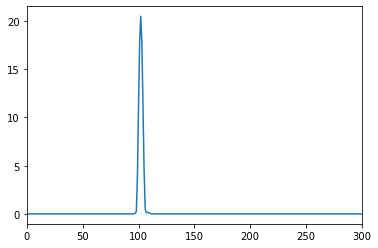

In [4]:
plt.plot(force_window(data["data"][:,0])*data["data"][:,0])
plt.xlim(0,300)

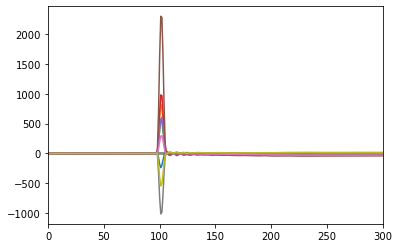

In [5]:
# filename_T = folder_name + '3.npy'
# _list_data = np.load(filename_T,allow_pickle=True)

# i = 2

plt.plot(0.01*force_window(_list_data[0]["data"][:,0])*_list_data[0]["data"][:,0])
plt.plot(9.81*_list_data[0]["data"][:,1:])
plt.xlim(0,300);

In [6]:
_list_data.shape

(10,)

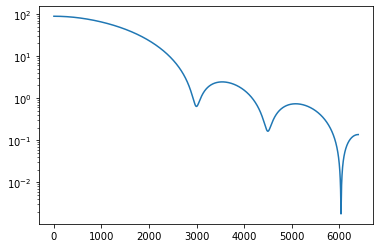

In [7]:
plt.semilogy(np.abs(np.fft.rfft(force_window(data["data"][:,0])*data["data"][:,0])))

In [8]:
try:
    os.mkdir(folder_name+"FRFs/")
except:
    pass

np.save(folder_name+"FRFs/"+"freq",freq)
np.save(folder_name+"FRFs/"+"H1_main",H1_main)
np.save(folder_name+"FRFs/"+"coh_main",coh_main)

In [9]:
from IPython.display import clear_output
from IPython.display import display
import ipywidgets as widgets

# %matplotlib qt

out_list = [i for i in range(_out)]
in_list = [i for i in range(_in)]

selection_out = widgets.SelectMultiple(
        options=out_list,
        value=out_list,
        rows = len(out_list),
        description = "Out"
    )

selection_in = widgets.SelectMultiple(
        options=in_list,
        value=in_list,
        rows = len(in_list),
        description = "In"
    )


button = widgets.Button(description="Plot")
output = widgets.Output()


def on_button_clicked(B):
    with output:
        clear_output()
        lst_in = list(selection_in.value)
        lst_out = list(selection_out.value)
        
        fig = plt.figure(figsize =(8,6))
        plt.subplot(311)
        for select_in in lst_in:
            for select_out in lst_out:
                plt.semilogy(freq,np.abs(H1_main[:,select_out,select_in]),linewidth = 0.6)
        plt.xlim(freq[0],freq[-1])
        

        plt.subplot(312)
        for select_in in lst_in:
            for select_out in lst_out:
                plt.plot(freq,np.angle(H1_main[:,select_out,select_in]),linewidth = 0.6)
        
        plt.xlim(freq[0],freq[-1])
        
        plt.subplot(313)
        for select_in in lst_in:
            for select_out in lst_out:
                plt.plot(freq,coh_main[:,select_out,select_in],linewidth = 0.6)
        
        plt.xlim(freq[0],freq[-1])
        plt.show()


button.on_click(on_button_clicked)
display(selection_out,selection_in, button, output)


SelectMultiple(description='Out', index=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17), option…

SelectMultiple(description='In', index=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17), options…

Button(description='Plot', style=ButtonStyle())

Output()